Lab1-project - Data Science for Business, Università degli Studi dell'Insubria.


Il progetto si focalizza sull'analisi e l'osservazione dei rapporti di lavoro attivati e cessati durante gli anni nella Regione Lombardia. Step 1. Raccolta dati dal sito ufficiale della Regione Lombardia. Step.2 Considerazioni sui dataset dopo import. Step.3 Pulizia dei dataset e correzioni. Step.4 Considerazioni sull'occupazione maschile e femminile. Step.5 Analisi annuale tenendo in considerazione di lavori cessati e attivati in ogni settore. Step.6 prearazione dei dati per realizzazione modello di predittività che consideri andamento del mercato lavorativo, in modo da fornire le posizioni più appetibili per i lavoratori sulla base dei dati forniti e alla richiesta di mercato.

Step 1. Raccolta dati dal sito ufficiale della Regione Lombardia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os.path import exists
import requests


In [3]:
if not exists('Rapporti_di_lavoro_attivati.csv'):
    file = requests.get("https://dati.lombardia.it/api/views/qbau-cyuc/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_attivati.csv', 'wb').write(file.content)

if not exists('Rapporti_di_lavoro_cessati.csv'):
    file = requests.get("https://dati.lombardia.it/api/views/nwz3-p6vm/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_cessati.csv', 'wb').write(file.content) 

In [4]:
attivati = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
cessati = pd.read_csv('Rapporti_di_lavoro_cessati.csv')

Partiamo dal considerare i contratti di lavoro attivati:

In [5]:
attivati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


In [6]:
attivati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [7]:
attivati.describe(include = 'all')

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
count,9579794,9579794,9.579794e+06,9576906,9579214,9579794,9139015,9579794,9579794
unique,2001,2,NaN,1224,12,54,5,12,199
top,09/10/2010,M,NaN,Alberghi,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,19895,5108146,NaN,467057,2721891,4820133,5337940,4765803,7223698
mean,NaN,NaN,3.530174e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178234e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
attivati['DATA'] = pd.to_datetime(attivati['DATA'], format="%d/%m/%Y", errors='coerce')
attivati.groupby("DATA")["DATA"].count()

DATA
1973-01-02       1
1974-06-11       1
1976-10-01       1
1978-05-01       1
1978-07-10       1
              ... 
2021-12-06    1097
2021-12-07    6873
2021-12-08    4962
2021-12-09     601
2201-09-06       1
Name: DATA, Length: 2001, dtype: int64

Studiamo quanti contratti sono stati attivati per anno:

In [9]:
attivati.loc[:, ['DATA']].value_counts()

DATA      
2010-10-09    19895
2018-12-01    16789
2011-07-10    16349
2011-07-11    15719
2021-10-09    15392
              ...  
2007-06-08        1
2007-04-09        1
2007-02-05        1
2007-02-03        1
2201-09-06        1
Length: 2001, dtype: int64

Considerazioni: Vi sono errori nel dataset. Per la nostra indagine, che si focalizza sulla predittività della dmanda di mercato e dei settori più proficui non abbiamo bisogno delle colonne della nazionalità, della provincia, e del titolo di studio.
Correggiamo quindi la colonna nel dataset rinominandola da italiano a nazionalità e consideriamo le età pensionabili che vanno dai 18 anni ai 67 per comodità di indagine.
Notiamo che vi sono dte che vanno molto a ritroso; per la nostra indagine consideriamo le date che partono dal 2009 ( anno dello sviluppo dei social e del cambiamento delle modalità lavorative verso un approccio più moderno) fino al 2021, dal momento che il 2022 non è ancora finito.

In [10]:
#null count e pulizia
attivati.isnull().sum()

DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
ITALIANO                          0
dtype: int64

In [11]:
# drop null
attivati.dropna(axis=0, how='any', inplace=True)
attivati.isnull().sum()

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
ITALIANO                     0
dtype: int64

In [12]:
attivati.drop('ITALIANO', inplace=True, axis=1)
attivati.drop("PROVINCIAIMPRESA", axis=1, inplace=True)
attivati.drop(attivati[(attivati.ETA < 18) | (attivati.ETA > 67)].index, inplace=True)
#range di interesse per un contratto lavorativo che possa essere rilevante nella media legale

In [13]:
attivati.drop(attivati[(attivati.SETTOREECONOMICODETTAGLIO == 'NON DEFINITO')].index, inplace = True) #ci serve sapere il settore economico

In [14]:
attivati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO
0,2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO
1,2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
3,2010-03-12,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO
4,2021-04-06,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO


In [15]:
attivatiCl = attivati[(attivati['DATA'].dt.year>2008 ) & (attivati['DATA'].dt.year<2022)]
attivatiCl.groupby("DATA")["DATA"].count()

DATA
2009-01-01      39
2009-01-02      87
2009-01-03      18
2009-01-04     153
2009-01-05      17
              ... 
2021-12-05    7704
2021-12-06    1080
2021-12-07    6718
2021-12-08    4912
2021-12-09     595
Name: DATA, Length: 1842, dtype: int64

In [16]:
attivatiCl.loc[:,"ANNO"] = attivatiCl['DATA'].dt.year
attivatiCl.loc[:,"MESE"]  = attivatiCl['DATA'].dt.month


C:\Users\ggudy\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [17]:
attivatiCl

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,ANNO,MESE
0,2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,2020,5
1,2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2019,7
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,2013,6
3,2010-03-12,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,2010,3
4,2021-04-06,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,2021,4
...,...,...,...,...,...,...,...,...,...
9579788,2019-08-07,M,40,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2019,8
9579789,2020-03-01,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2020,3
9579790,2010-09-06,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,2010,9
9579791,2021-11-06,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2021,11


Text(0, 0.5, 'NUMERO ATTIVAZIONI')

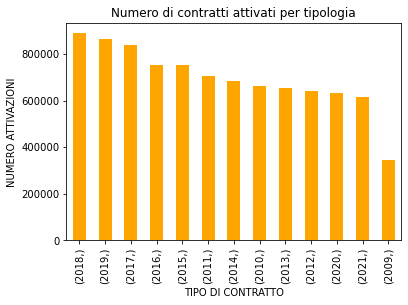

In [18]:
value_count_modalita = attivatiCl.loc[:, ['ANNO']].value_counts()
plt.ticklabel_format(style='plain')
abscissa_axis=value_count_modalita.index
ordinate_axis=value_count_modalita.values
ax=value_count_modalita.plot.bar(x=abscissa_axis,y=ordinate_axis,color='orange')
plt.title('Numero di contratti attivati per tipologia')
plt.xlabel('TIPO DI CONTRATTO')
plt.ylabel('NUMERO ATTIVAZIONI')

Inseriamo un boxplot, il quale è la rappresentazione di un grafico statistico che si utilizza per variabili quantitative. É molto utile per capire se la distribuzione è simmetrica oppure asimmetrica e per confrontare la forma di più distribuzioni. Ma soprattutto permette di identificare in modo rapido e preciso valori anomali e outliers.

<AxesSubplot:xlabel='ETA'>

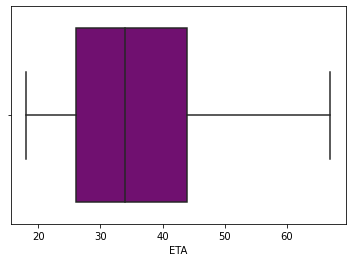

In [19]:
#Boxplot età -contratti di lavoro attivati-
sns.boxplot(x = attivatiCl['ETA'], color='purple')

In [20]:
attivatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()

SETTOREECONOMICODETTAGLIO                                                                                                                                                      
Alberghi                                                                                                                                                                           458357
Ristorazione con somministrazione                                                                                                                                                  432653
Attività di produzione cinematografica, di video e di programmi televisivi                                                                                                         367815
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                    343806
Altri servizi di supporto alle imprese nca                                      

Text(0, 0.5, 'SETTORE')

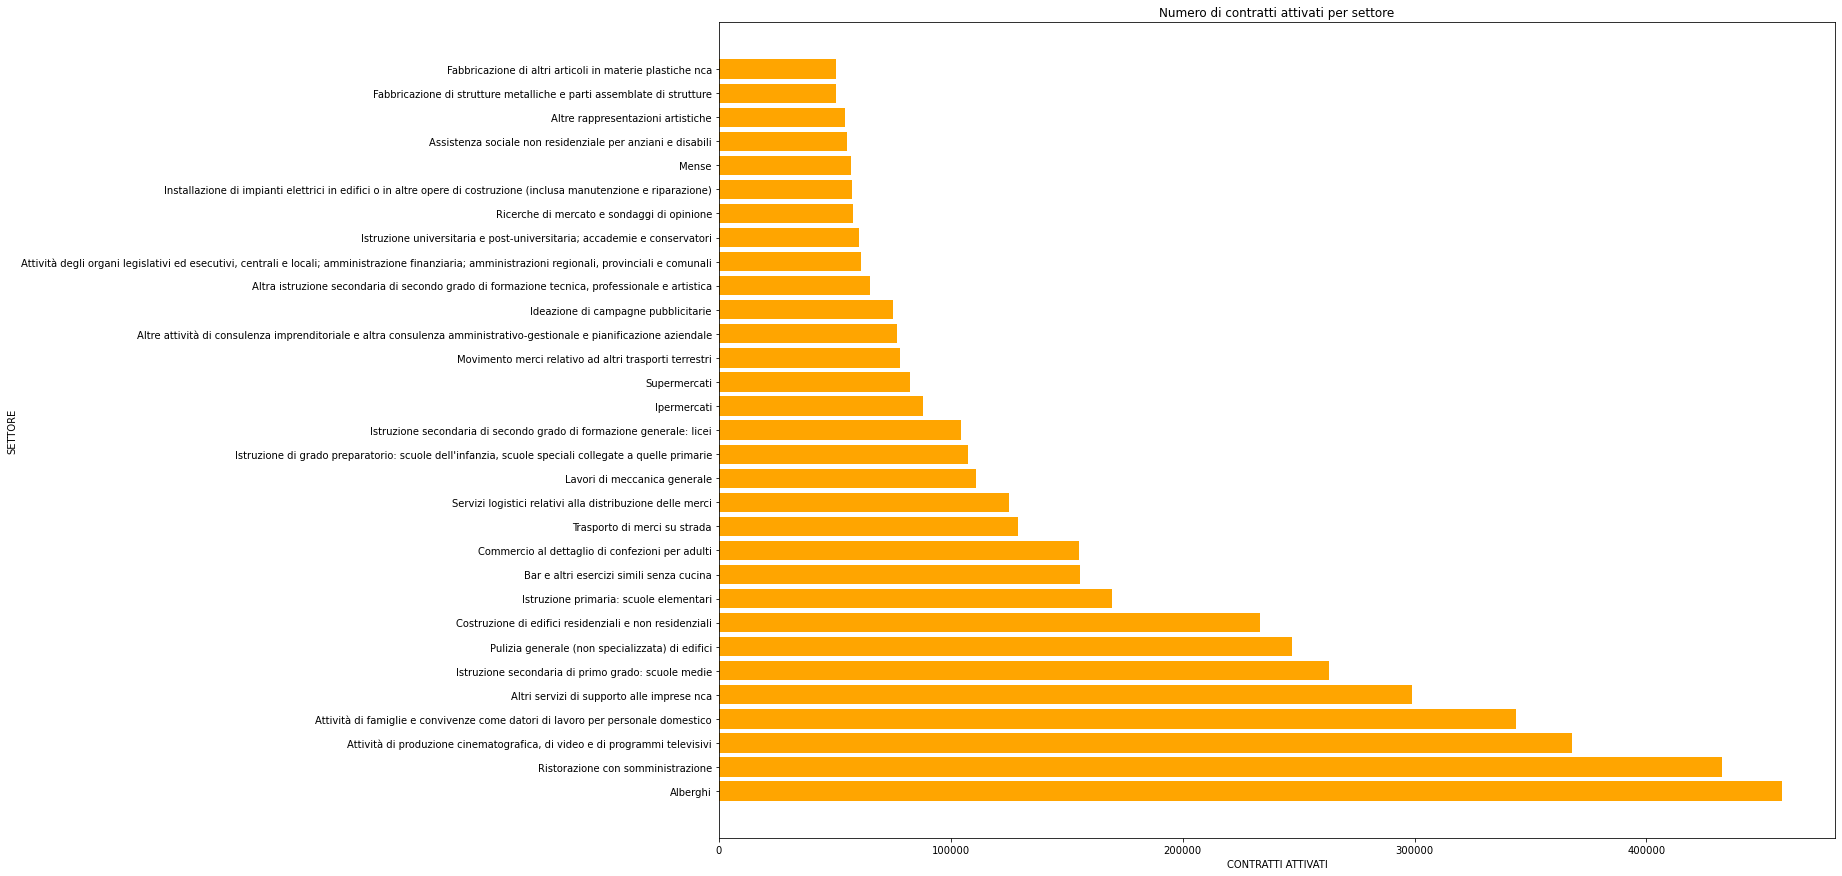

In [21]:
#plt.ticklabel_format(style='plain')
counts=attivatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()  
counts=counts[counts.values>50000]
pltfigsize=(20,15)
plt.figure(figsize=pltfigsize) 
plt.ticklabel_format(style='plain') #Importante lasciare qui questo comando 
plt.barh(y=[i[0] for i in counts.index], width=counts.values, color='orange')
plt.title('Numero di contratti attivati per settore')
plt.xlabel('CONTRATTI ATTIVATI')
plt.ylabel('SETTORE')

In [22]:
attivatiCl.loc[:,['SETTOREECONOMICODETTAGLIO']].value_counts().head(10)

SETTOREECONOMICODETTAGLIO                                                      
Alberghi                                                                           458357
Ristorazione con somministrazione                                                  432653
Attività di produzione cinematografica, di video e di programmi televisivi         367815
Attività di famiglie e convivenze come datori di lavoro per personale domestico    343806
Altri servizi di supporto alle imprese nca                                         298858
Istruzione secondaria di primo grado: scuole medie                                 263103
Pulizia generale (non specializzata) di edifici                                    247297
Costruzione di edifici residenziali e non residenziali                             233517
Istruzione primaria: scuole elementari                                             169297
Bar e altri esercizi simili senza cucina                                           155639
dtype: int64

Tipologie di contratti di lavoro attivati:

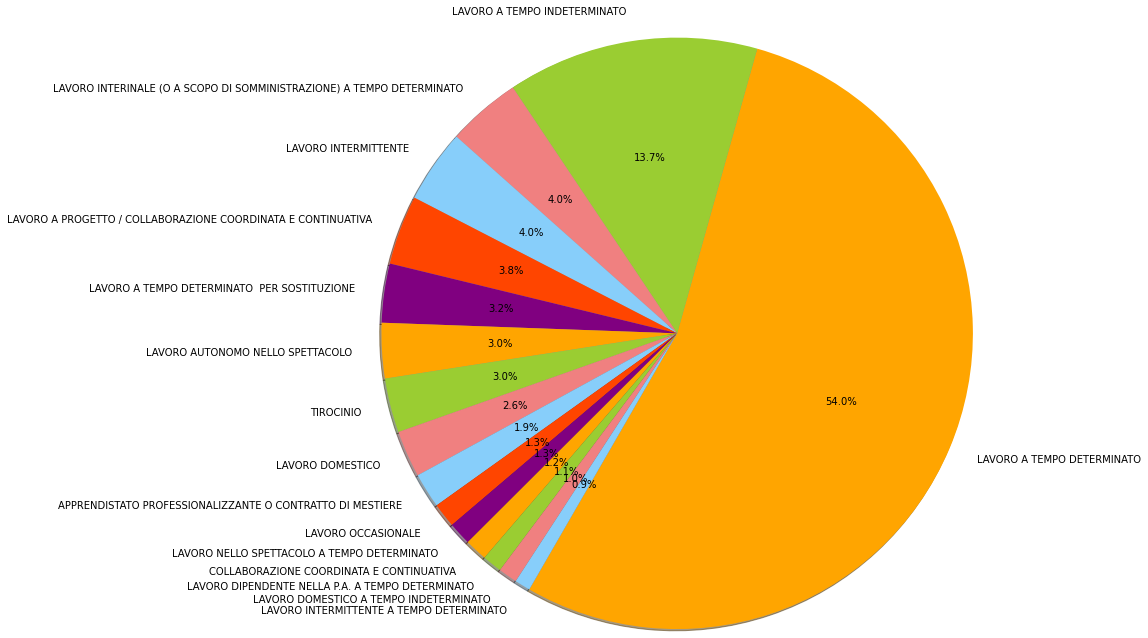

In [23]:
counts=attivatiCl.loc[:, ['CONTRATTO']].value_counts()
counts=counts[counts.values>75000]
cols = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orangered', 'purple']
plt.pie(counts,labels=[i[0] for i in counts.index],autopct='%1.1f%%',colors=cols,startangle=240,shadow=True,radius=3.4)
plt.show()

Consideriamo i lavori cessati

In [24]:
cessati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741394 entries, 0 to 3741393
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 256.9+ MB


In [25]:
cessati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [26]:
cessati.describe(include = 'all')

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
count,3741394,3741394,3.741394e+06,3740375,3740954,3741394,3741394,3741394,3741394
unique,2323,2,NaN,1205,12,54,5,12,197
top,01/03/2011,M,NaN,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,13688,2117550,NaN,277163,1218408,1913224,2206367,1658400,2595080
mean,NaN,NaN,3.811410e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.261611e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cessati['DATA'] = pd.to_datetime(attivati['DATA'], format="%d/%m/%Y", errors='coerce')
cessati.groupby("DATA")["DATA"].count()

DATA
1974-06-11       1
1976-10-01       1
1978-05-01       1
1978-07-10       1
1980-01-08       1
              ... 
2021-12-05    3034
2021-12-06     414
2021-12-07    2628
2021-12-08    1939
2021-12-09     267
Name: DATA, Length: 1977, dtype: int64

In [28]:
cessati.loc[:,['DATA']].value_counts()

DATA      
2010-10-09    6665
2018-12-01    6502
2015-09-01    5757
2021-10-09    5751
2019-03-10    5653
              ... 
2008-10-10       1
2008-11-12       1
2008-02-08       1
2008-02-05       1
1974-06-11       1
Length: 1977, dtype: int64

In [29]:
cessati.isnull().sum()

DATA                         211764
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      1019
TITOLOSTUDIO                    440
CONTRATTO                         0
MODALITALAVORO                    0
PROVINCIAIMPRESA                  0
ITALIANO                          0
dtype: int64

In [30]:
# drop null
cessati.dropna(axis=0, how='any', inplace=True)
cessati.isnull().sum()

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
ITALIANO                     0
dtype: int64

In [31]:
cessati.drop('ITALIANO', inplace=True, axis=1)
cessati.drop("PROVINCIAIMPRESA", axis=1, inplace=True)
cessati.drop(cessati[(cessati.ETA < 18) | (cessati.ETA > 67)].index, inplace=True)
#range di interesse per un contratto lavorativo che possa essere rilevante nella media

In [32]:
cessati.drop(cessati[(cessati.SETTOREECONOMICODETTAGLIO == 'NON DEFINITO')].index, inplace = True)

In [33]:
cessati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO
0,2020-05-09,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
1,2019-07-12,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
3,2010-03-12,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO
4,2021-04-06,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO


In [34]:
cessatiCl = cessati[(cessati['DATA'].dt.year>2008 ) & (cessati['DATA'].dt.year<2022)]
cessatiCl.groupby("DATA")["DATA"].count()

DATA
2009-01-01      16
2009-01-02      29
2009-01-03       2
2009-01-04      63
2009-01-05       7
              ... 
2021-12-05    3004
2021-12-06     410
2021-12-07    2593
2021-12-08    1920
2021-12-09     265
Name: DATA, Length: 1842, dtype: int64

In [35]:
cessatiCl.loc[:,"ANNO"] = cessatiCl['DATA'].dt.year
cessatiCl.loc[:,"MESE"]  = cessatiCl['DATA'].dt.month


C:\Users\ggudy\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Text(0, 0.5, 'NUMERO CONTRATTI CESSATI')

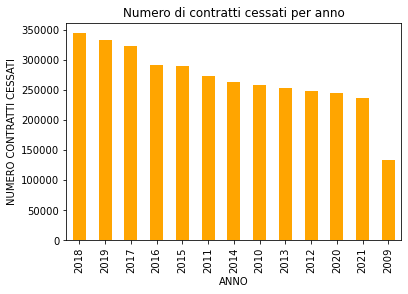

In [36]:
cessatiCl.ANNO.value_counts()
plt.ticklabel_format(style='plain')
value_count_modalita=cessatiCl.ANNO.value_counts()
abscissa_axis=value_count_modalita.index
ordinate_axis=value_count_modalita.values
ax=value_count_modalita.plot.bar(x=abscissa_axis,y=ordinate_axis,color='orange')
plt.title('Numero di contratti cessati per anno')
plt.xlabel('ANNO')
plt.ylabel('NUMERO CONTRATTI CESSATI')

<AxesSubplot:xlabel='ETA'>

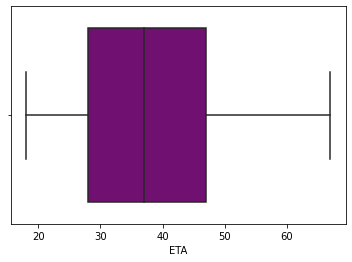

In [37]:
#Boxplot CESSATI età
sns.boxplot(x=cessatiCl.ETA, color='purple')

In [38]:
cessatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()

SETTOREECONOMICODETTAGLIO                                                                                                                                                                                  
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                                                257865
Ristorazione con somministrazione                                                                                                                                                                              198004
Costruzione di edifici residenziali e non residenziali                                                                                                                                                         172537
Altri servizi di supporto alle imprese nca                                                                                                                

--------------------------------------------------------

Numero di contratti cessati per settore

Text(0, 0.5, 'SETTORE')

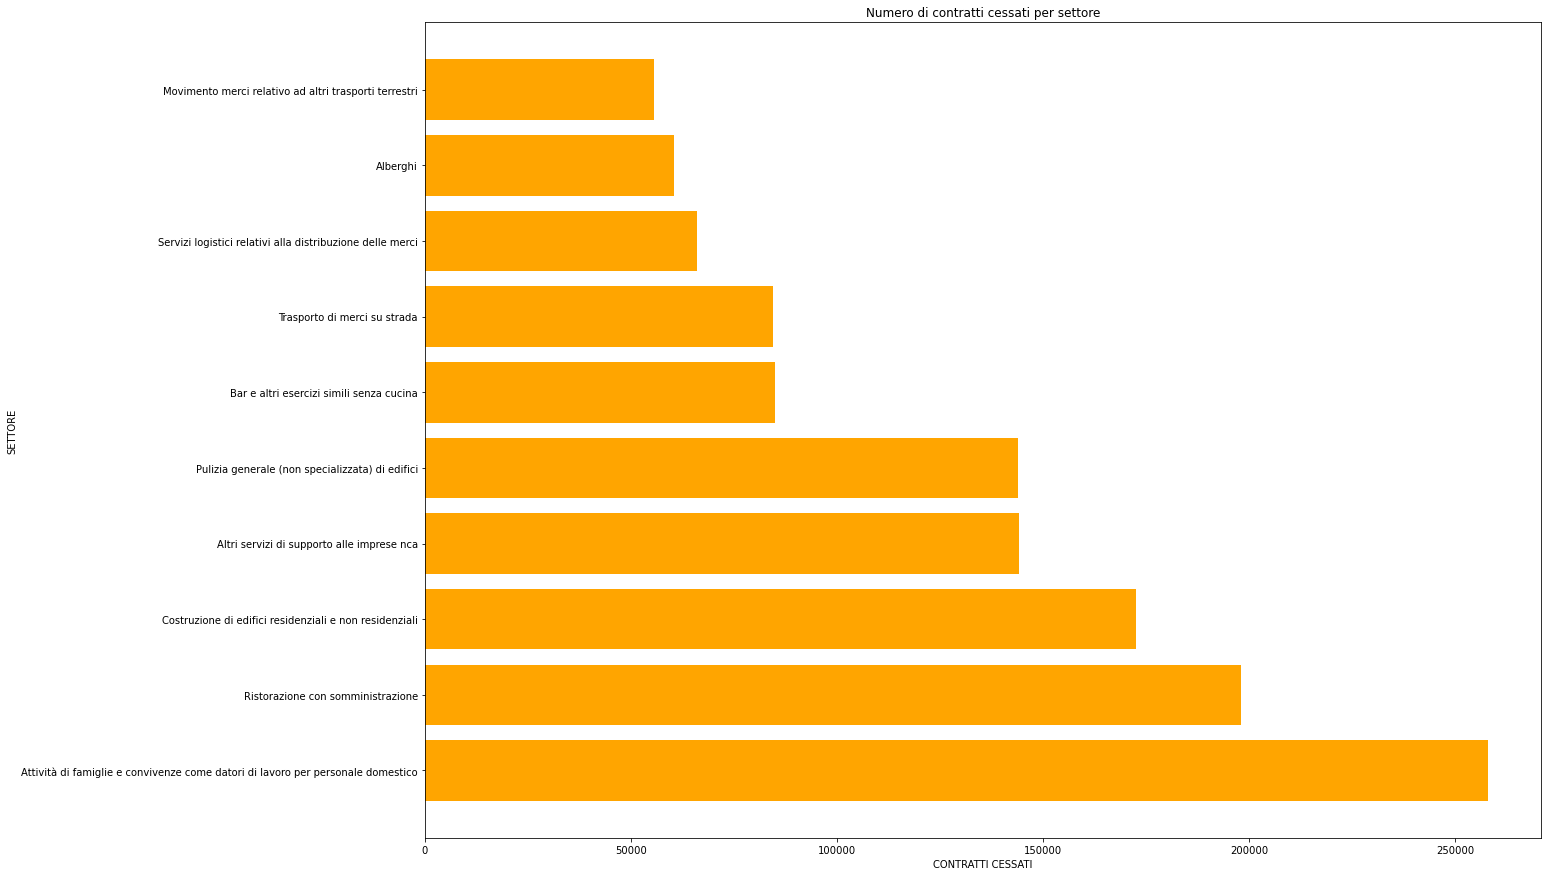

In [39]:
#plt.ticklabel_format(style='plain')
counts=cessatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()  
counts=counts[counts.values>50000]
pltfigsize=(20,15)
plt.figure(figsize=pltfigsize) 
plt.ticklabel_format(style='plain') #Importante lasciare qui questo comando 
plt.barh(y=[i[0] for i in counts.index], width=counts.values, color='orange')
plt.title('Numero di contratti cessati per settore')
plt.xlabel('CONTRATTI CESSATI')
plt.ylabel('SETTORE')

Tipologie di contratti di lavoro cessati:

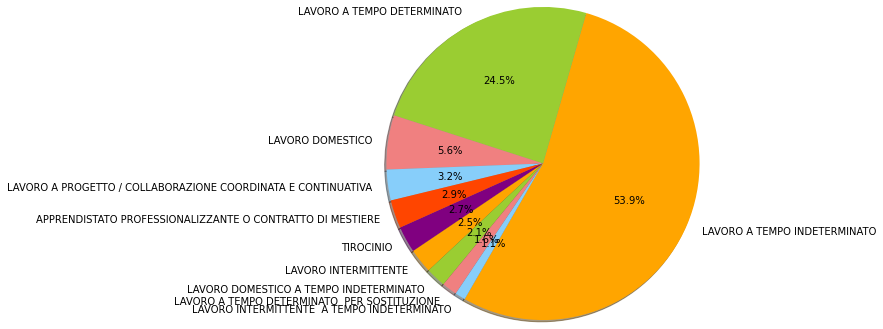

In [40]:
counts=cessatiCl.loc[:, ['CONTRATTO']].value_counts()
counts=counts[counts.values>30000]
cols = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orangered', 'purple']
plt.pie(counts,labels=[i[0] for i in counts.index],autopct='%1.1f%%',colors=cols,startangle=240,shadow=True,radius=1.8)
plt.show()

Histplot (explanation): Plot univariate or bivariate histograms to show distributions of datasets. A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

Analisi della distribuzione (DENSITÀ)

Text(0.5, 1.0, 'Distribuzione contratti cessati negli anni')

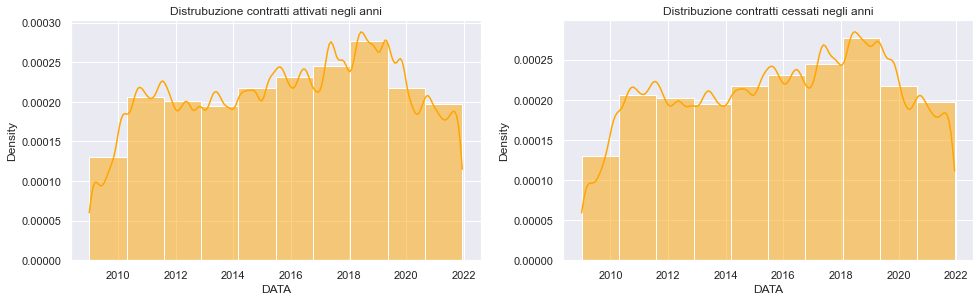

In [41]:
sns.set(rc={"figure.figsize":(25,15)})
plt.subplot(3,3,2)
sns.histplot(attivatiCl.DATA,label="DATA",stat="density",bins=10,kde=True, color="orange").set_title("Distrubuzione contratti attivati negli anni")
plt.subplot(3,3,3)
sns.histplot(cessatiCl.DATA,label="DATA",stat="density",bins=10,kde=True, color="orange").set_title("Distribuzione contratti cessati negli anni")

Considerazioni:

A seguito di un'analisi sul dataset, dopo una iniziale scrematura dei dati, si è potuto considerare come ci sia stato un incremento di contratti attivati a partire dall'anno 2009. Abbiamo dunque considerato l'era della digitalizzazione come intervallo di tempo cruciale su cui fare riferimento. In particolare, si è voluto avere un focus a partire dall'anno 2009 e fino al 2021. Da una analisi del numero di contratti attivati per settore, abbiamo potuto osservare come il SETTORE ALBERGHIERO sia quello con più contratti attivati, e quello più richiesto, seguito da RISTORAZIONE CON SOMMINISTRAZIONE e ATTIVITÀ DI PRODUZIONE CINEMATOGRAFICA, DI VIDEO E DI PROGRAMMI TELEVISIVI. In particolare, l'anno 2018 rappresenta quello con il maggior numero di contratti attivati.

Riguardo i contratti cessati, un dataset meno consistente di quello precedente, dopo le varie analisi spicca come le ATTIVITÀ NEL SETTORE DOMESTICO (nello specifico denominate come "attività di famiglie e convivenze come datori di lavoro per personale domestico") sia quella con più contratti cessati, dato coerente con lo sviluppo digitale che inquadra un allontanamento del personale domestico in favore di tecnologie che possano svolgere compiti richiesti. Il settore Alberghiero risulta quindi uno dei più richiesti, dal momento che è poco colpito dal punto di vista dei licenziamenti e dei contratti cessati, assieme al settore dei trasporti. Anche per quanto riguarda i contratti cessati, l'anno 2018 rappresenta quello con maggior numero di record, seguito poi da 2019 e 2017. Abbiamo altresì notato come i contratti di lavoro con tipologia a TEMPO INDETERMINATO siano quelli con un maggior numero di cessazioni, seguiti da quelli a TEMPO DETERMINATO.



In [42]:
attivatiCl.ETA.mean()

35.34094555467996

In [43]:
attivatiCl.ETA.std()

11.523471509928566

In [44]:
cessatiCl.ETA.mean()

38.03246887743921

In [45]:
cessatiCl.ETA.std()

12.300528967627498

In [46]:
attivatiCl.GENERE.value_counts()

M    4793508
F    4241612
Name: GENERE, dtype: int64

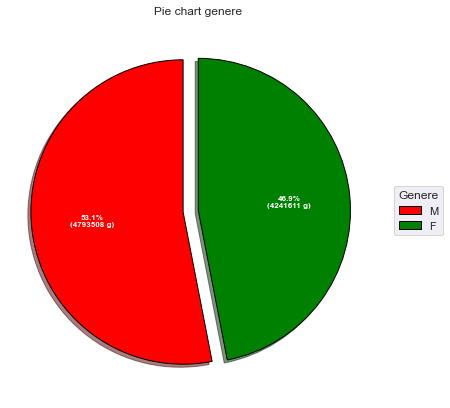

In [47]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
geners = attivatiCl.GENERE.value_counts()

data = geners.values
indx = geners.index
 
 
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "red", "green")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = indx,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, indx,
          title ="Genere",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Pie chart genere")
 
# show plot
plt.show()

L'età media in cui si ha un aumento significativo per l'attivazione dei contratti è 35/36 anni, con una deviazione di circa 12 anni, mentre per i contratti cessati è 38 anni, con una deviazione di circa 12 anni. Questo significa che in media è più probabile che un contratto attivato a 35 anni duri circa 3/4 anni prima di essere cambiato.



In [48]:
cessatiCl.GENERE.value_counts()

M    1972266
F    1518369
Name: GENERE, dtype: int64

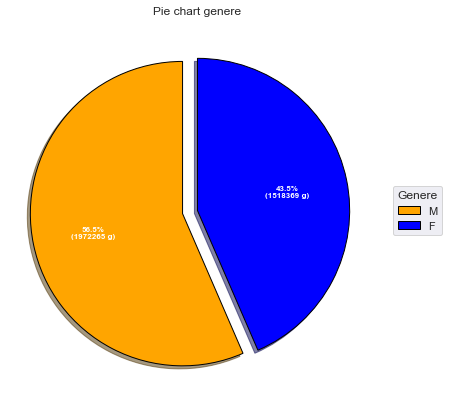

In [49]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
geners = cessatiCl.GENERE.value_counts()

data = geners.values
indx = geners.index
 
 
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "blue")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = indx,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, indx,
          title ="Genere",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Pie chart genere")
 
# show plot
plt.show()

Possiamo notare che i maschi tendono ad attivare e cessare contratti più frequentemente delle femmine, nonostante esse a livello di censimento siano più numerose dei maschi. Questo denota una tendenza a preferire un contratto stabile da parte delle femmine.

Dopo aver pulito e analizzato i dataset conviene unirli iin un unico dataset che descriva contratti attivati e cessati contemporaneamente

In [50]:
attivatiCl.loc[:,["STATO"]] = 'ATTIVATO'
cessatiCl.loc[:,["STATO"]] = 'CESSATO'
dFrams = [attivatiCl, cessatiCl]
dataset = pd.concat(dFrams)

C:\Users\ggudy\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
dataset

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,ANNO,MESE,STATO
0,2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,2020,5,ATTIVATO
1,2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2019,7,ATTIVATO
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,2013,6,ATTIVATO
3,2010-03-12,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,2010,3,ATTIVATO
4,2021-04-06,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,2021,4,ATTIVATO
...,...,...,...,...,...,...,...,...,...,...
3741389,2021-03-09,M,19,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2021,3,CESSATO
3741390,2013-02-09,M,67,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,2013,2,CESSATO
3741391,2013-09-09,M,59,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,2013,9,CESSATO
3741392,2021-10-06,M,26,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,2021,10,CESSATO


In [52]:
attivazioni = dataset.loc[(dataset["STATO"] == 'ATTIVATO')].groupby("SETTOREECONOMICODETTAGLIO",as_index=False).count()
terminazioni = dataset.loc[(dataset["STATO"] == 'CESSATO')].groupby("SETTOREECONOMICODETTAGLIO",as_index=False).count()
#raggruppo attivazioni e terminazioni contratti

In [53]:
attivazioni.count()

SETTOREECONOMICODETTAGLIO    1224
DATA                         1224
GENERE                       1224
ETA                          1224
TITOLOSTUDIO                 1224
CONTRATTO                    1224
MODALITALAVORO               1224
ANNO                         1224
MESE                         1224
STATO                        1224
dtype: int64

In [54]:
terminazioni.count()

SETTOREECONOMICODETTAGLIO    1205
DATA                         1205
GENERE                       1205
ETA                          1205
TITOLOSTUDIO                 1205
CONTRATTO                    1205
MODALITALAVORO               1205
ANNO                         1205
MESE                         1205
STATO                        1205
dtype: int64

In [55]:
df = pd.DataFrame(columns=["SETTORE","ATTIVATI","CESSATI"])
for index in range(len(attivazioni)):
    for index2 in range(len(terminazioni)):
        if(attivazioni["SETTOREECONOMICODETTAGLIO"][index] == terminazioni["SETTOREECONOMICODETTAGLIO"][index2]):
            df = df.append({"SETTORE":attivazioni["SETTOREECONOMICODETTAGLIO"][index],"ATTIVATI":attivazioni["STATO"][index],
            "CESSATI":terminazioni["STATO"][index2]},ignore_index=True)
df.sort_values (by='ATTIVATI', ascending = False)

,SETTORE,ATTIVATI,CESSATI
60,Alberghi,458357,60536
1114,Ristorazione con somministrazione,432653,198004
203,"Attività di produzione cinematografica, di vid...",367815,7430
184,Attività di famiglie e convivenze come datori ...,343806,257865
120,Altri servizi di supporto alle imprese nca,298858,144074
...,...,...,...
962,"Procacciatori d'affari di prodotti di carta, c...",3,3
628,Fabbricazione di centrifughe per laboratori,3,2
251,Coltivazione di ortaggi (inclusi i meloni) in ...,2,1
163,Attività delle guide alpine,1,2


In [56]:
most_important =df.sort_values (by='ATTIVATI', ascending = False).head(30)
most_important

,SETTORE,ATTIVATI,CESSATI
60,Alberghi,458357,60536
1114,Ristorazione con somministrazione,432653,198004
203,"Attività di produzione cinematografica, di vid...",367815,7430
184,Attività di famiglie e convivenze come datori ...,343806,257865
120,Altri servizi di supporto alle imprese nca,298858,144074
860,Istruzione secondaria di primo grado: scuole m...,263103,22867
1028,Pulizia generale (non specializzata) di edifici,247297,143863
484,Costruzione di edifici residenziali e non resi...,233517,172537
859,Istruzione primaria: scuole elementari,169297,13808
230,Bar e altri esercizi simili senza cucina,155639,84844


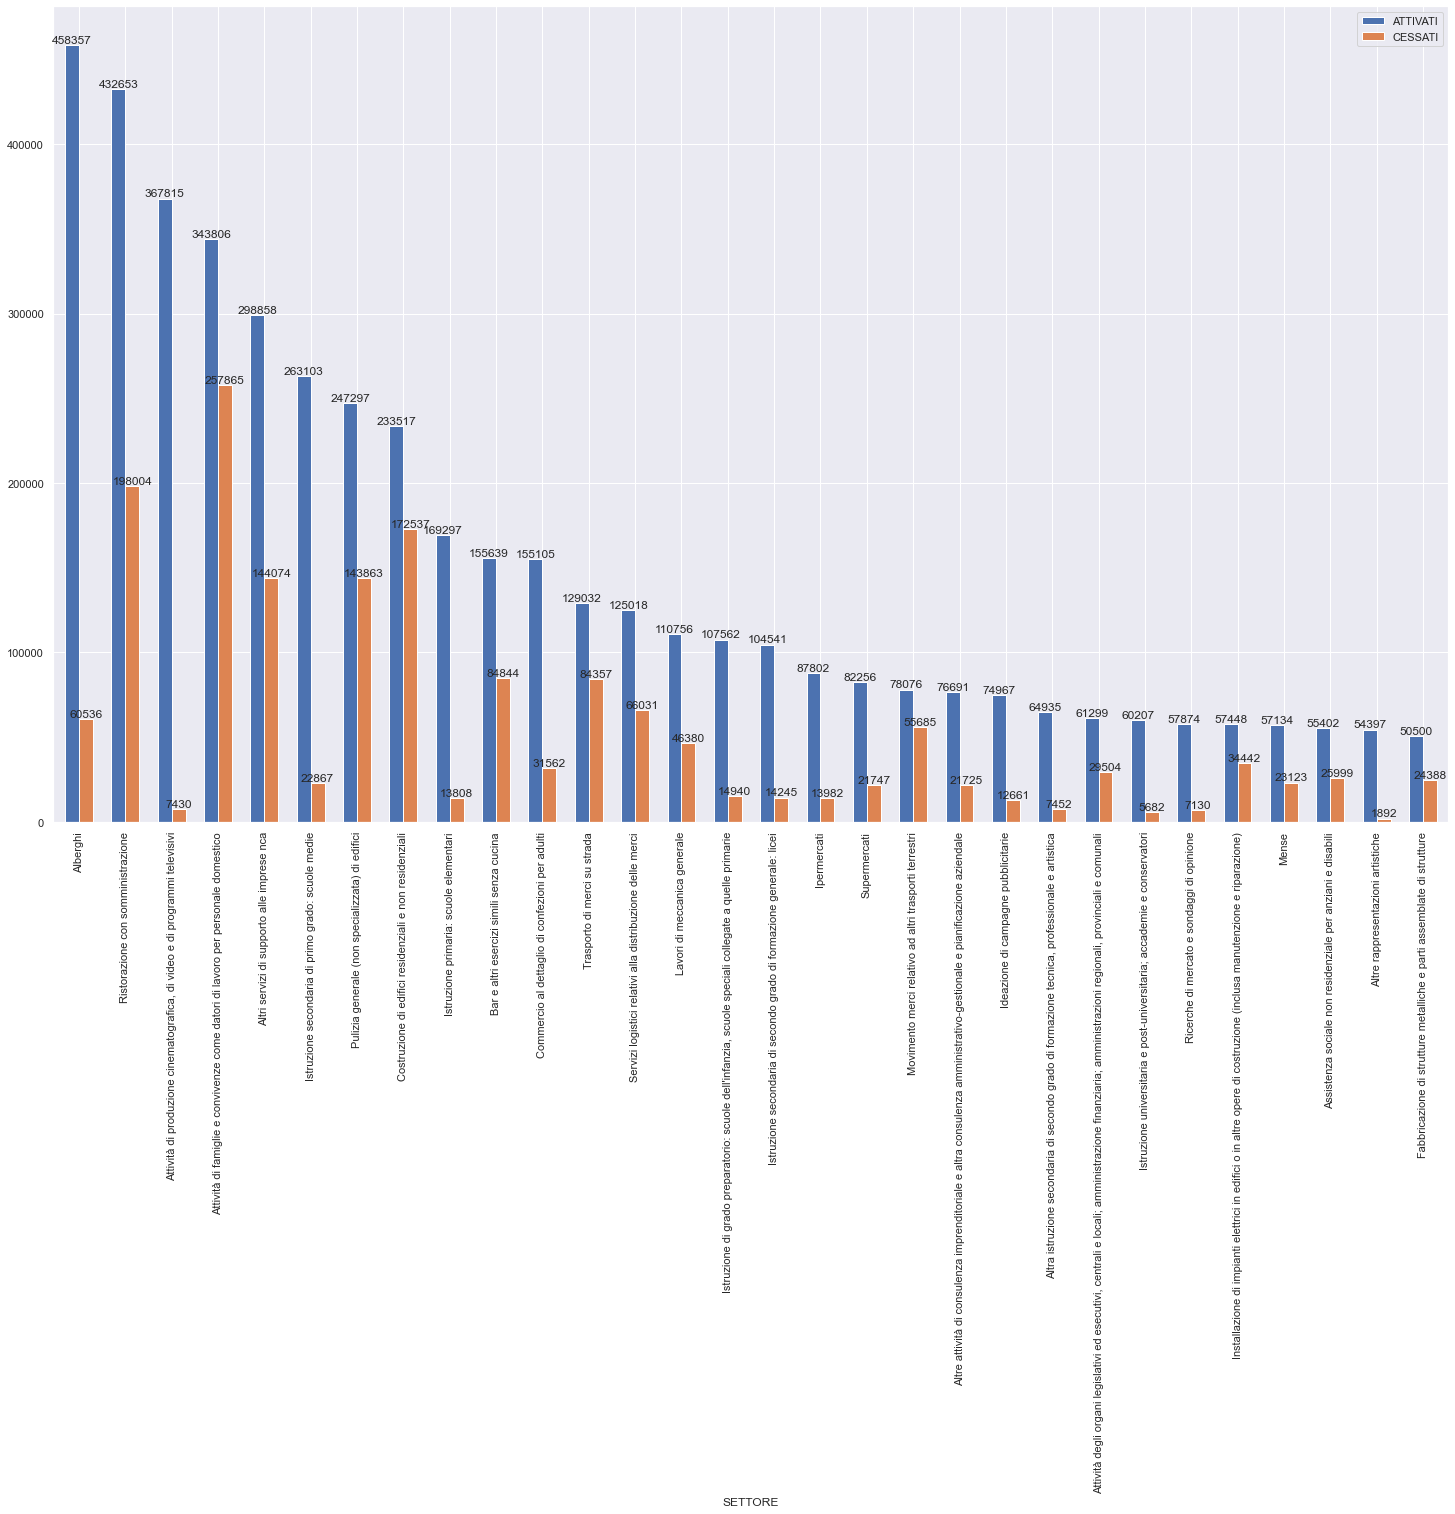

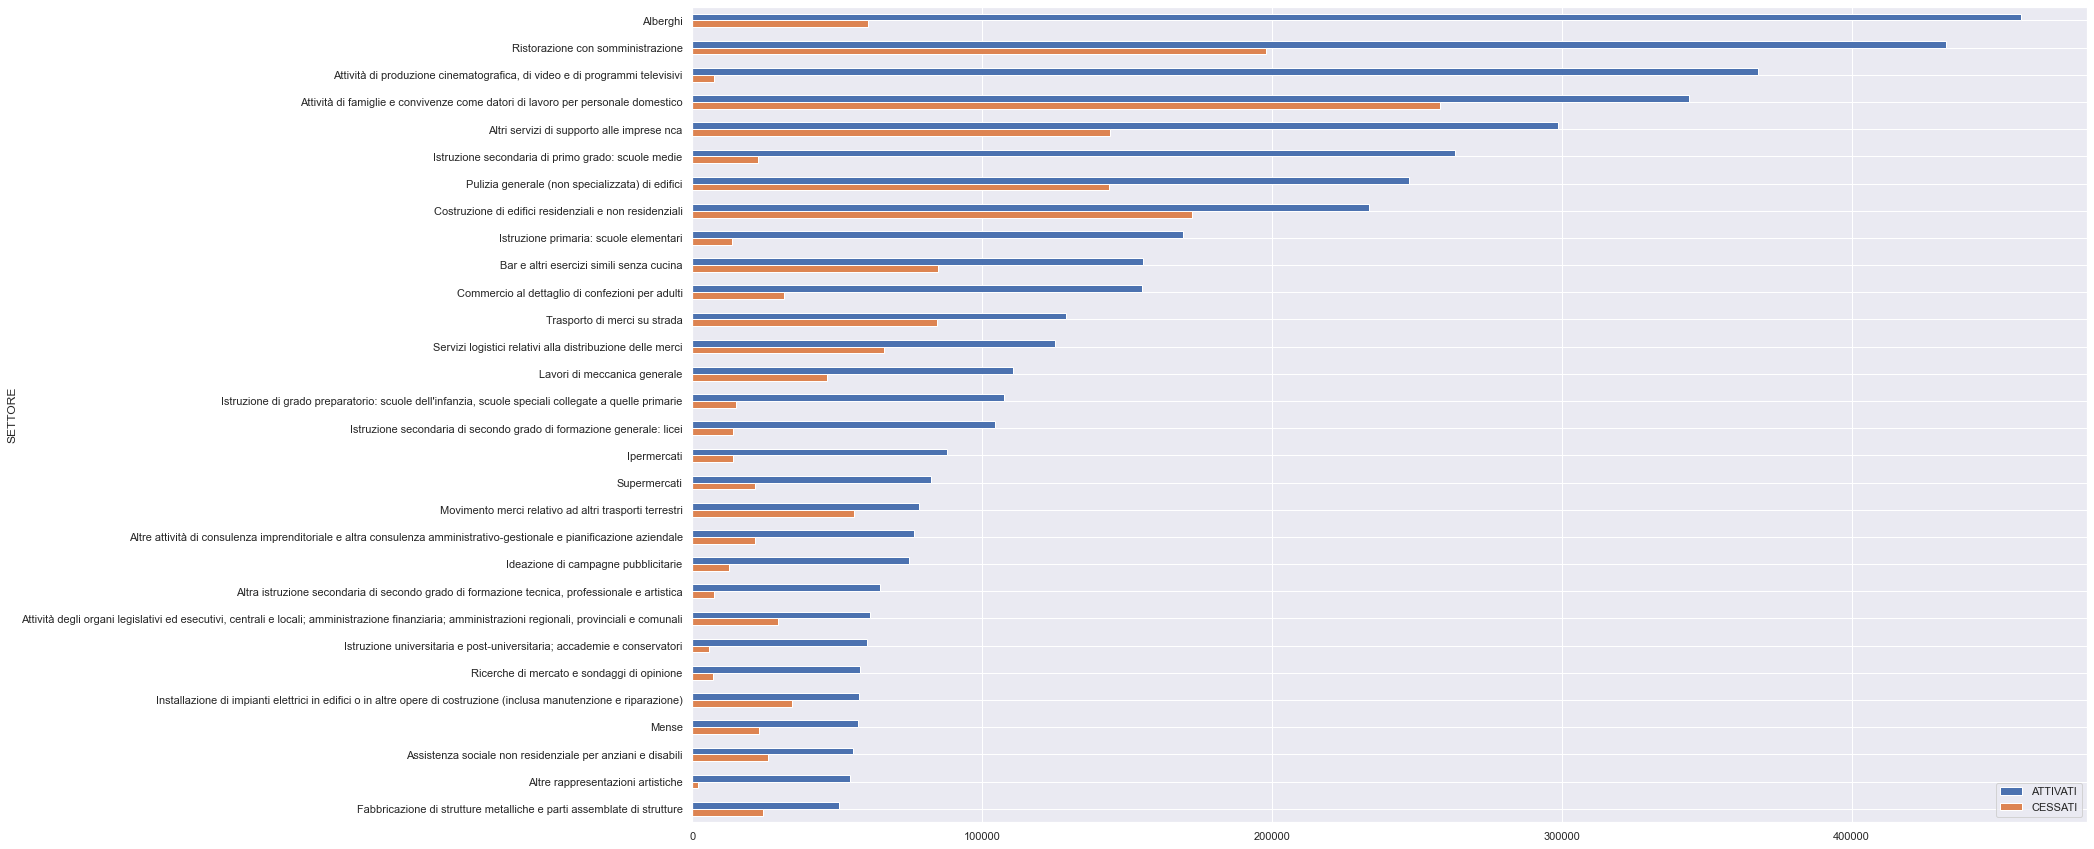

In [57]:
ax = most_important.plot.bar(width = 0.6, x = 'SETTORE')
ax2 = most_important.plot.barh(x = 'SETTORE')
ax2.invert_yaxis()

for container in ax.containers:
    ax.bar_label(container)

In [58]:
dataset.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,ANNO,MESE,STATO
0,2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,2020,5,ATTIVATO
1,2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,2019,7,ATTIVATO
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,2013,6,ATTIVATO
3,2010-03-12,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,2010,3,ATTIVATO
4,2021-04-06,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,2021,4,ATTIVATO


In [59]:
#per comodità togliamo titolo di studio e contratto giacchè domina il contratto a tempo determinato enon ci interessa per la nostra analisi
dataset2 = dataset.loc[:, ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'STATO', 'ANNO', 'MESE',]]

In [60]:
dataset2

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,STATO,ANNO,MESE
0,2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,ATTIVATO,2020,5
1,2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",ATTIVATO,2019,7
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,ATTIVATO,2013,6
3,2010-03-12,F,28,Alberghi,ATTIVATO,2010,3
4,2021-04-06,F,49,Rifugi di montagna,ATTIVATO,2021,4
...,...,...,...,...,...,...,...
3741389,2021-03-09,M,19,Fabbricazione di altri elementi in legno e di ...,CESSATO,2021,3
3741390,2013-02-09,M,67,Altra istruzione secondaria di secondo grado d...,CESSATO,2013,2
3741391,2013-09-09,M,59,Costruzione di edifici residenziali e non resi...,CESSATO,2013,9
3741392,2021-10-06,M,26,Installazione di altre macchine ed apparecchia...,CESSATO,2021,10


Encoding dei dati non numerici

In [61]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
gener = dataset2['GENERE'].values.reshape(-1,1)
enc = OneHotEncoder()
arr = enc.fit_transform(gener).toarray()
nHot = pd.DataFrame(arr, columns = ['F', 'M'])
encodedDf = pd.concat([pd.DataFrame(), nHot], axis=1)
encodedDf.head()

,F,M
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [62]:
stat = dataset2['STATO'].values.reshape(-1,1)
enc2 = OneHotEncoder()
arr = enc2.fit_transform(stat).toarray()
nHot2 = pd.DataFrame(arr, columns = ['ATTIVATO', 'CESSATO'])
encodedDf = pd.concat([encodedDf, nHot2], axis=1)
encodedDf.head()

,F,M,ATTIVATO,CESSATO
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0


In [63]:
encodedDf.tail()

,F,M,ATTIVATO,CESSATO
12525750,0.0,1.0,0.0,1.0
12525751,0.0,1.0,0.0,1.0
12525752,0.0,1.0,0.0,1.0
12525753,0.0,1.0,0.0,1.0
12525754,0.0,1.0,0.0,1.0


In [64]:
transField = LabelEncoder().fit_transform(dataset2.SETTOREECONOMICODETTAGLIO)
encodedDf['SETTORE'] = transField
encodedDf.head()

,F,M,ATTIVATO,CESSATO,SETTORE
0,1.0,0.0,1.0,0.0,188
1,0.0,1.0,1.0,0.0,830
2,1.0,0.0,1.0,0.0,542
3,1.0,0.0,1.0,0.0,62
4,1.0,0.0,1.0,0.0,1073


Time series e analisi

In [65]:
dataset3 = dataset2.copy()
cols = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'STATO', 'ANNO', 'MESE']

In [66]:
dataset3.set_index('DATA', inplace=True)
dataset3.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,STATO,ANNO,MESE
DATA,,,,,,
2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,ATTIVATO,2020,5
2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",ATTIVATO,2019,7
2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,ATTIVATO,2013,6
2010-03-12,F,28,Alberghi,ATTIVATO,2010,3
2021-04-06,F,49,Rifugi di montagna,ATTIVATO,2021,4


In [67]:
#preparazione subset mesi per tSeries
groupMeseA = dataset3.loc[(dataset3["STATO"] == 'ATTIVATO')].groupby("MESE",as_index=True).count()
groupMeseC = dataset3.loc[(dataset3["STATO"] == 'CESSATO')].groupby("MESE",as_index=True).count()
#preparazione subset anni per tSeries
groupAnnoA = dataset3.loc[(dataset3["STATO"] == 'ATTIVATO')].groupby("ANNO",as_index=True).count()
groupAnnoC = dataset3.loc[(dataset3["STATO"] == 'CESSATO')].groupby("ANNO",as_index=True).count()

Analizzo andamento mesi

In [68]:
groupMeseA.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,STATO,ANNO
MESE,,,,,
1,628549,628549,628549,628549,628549
2,683808,683808,683808,683808,683808
3,736715,736715,736715,736715,736715
4,794977,794977,794977,794977,794977
5,760073,760073,760073,760073,760073


C:\Users\ggudy\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='MESE'>

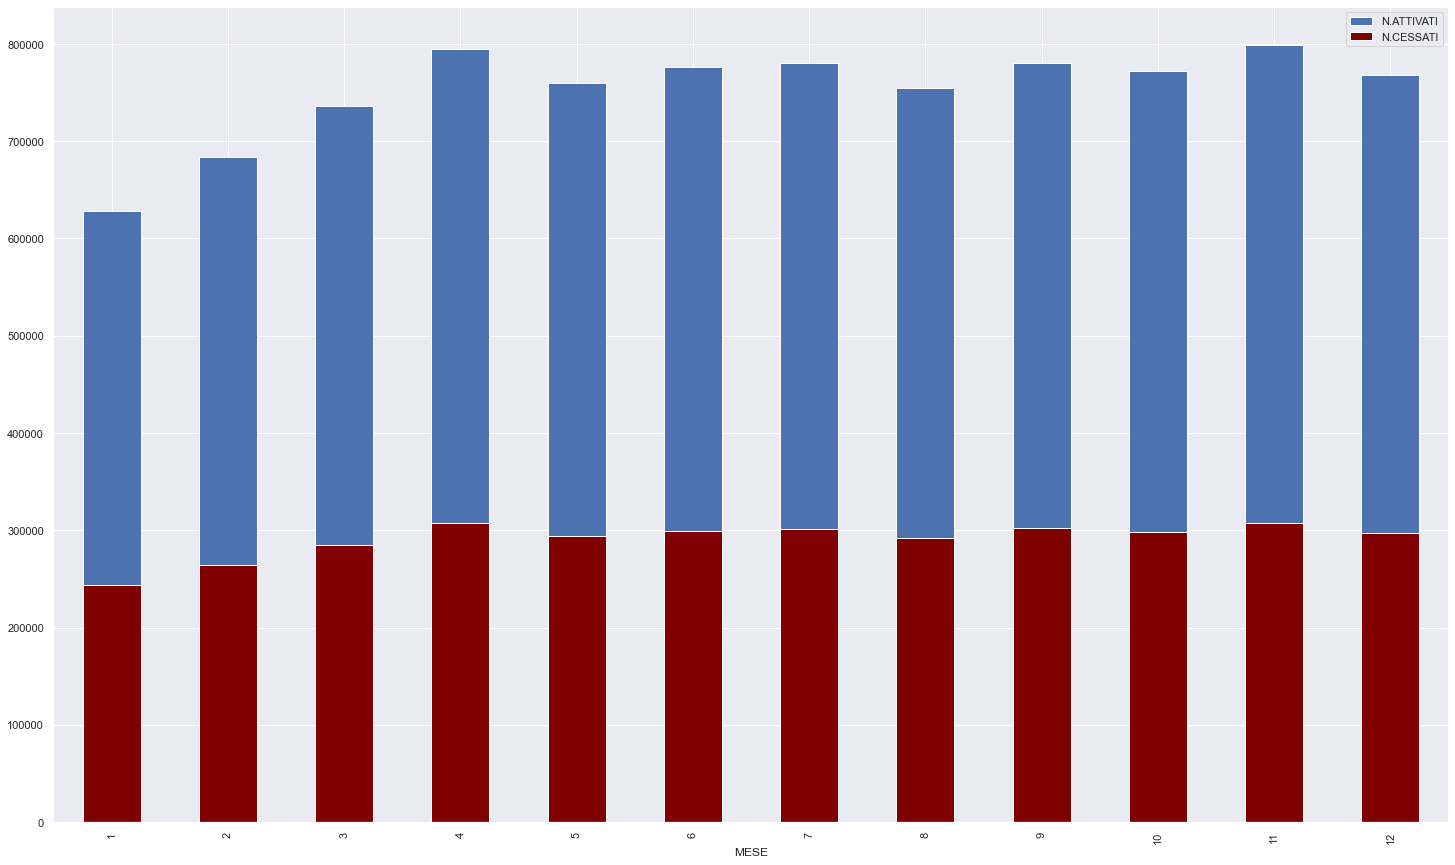

In [69]:
gToPlot1 = groupMeseA.iloc[:, [2]]
gToPlot1.rename(columns={'SETTOREECONOMICODETTAGLIO': 'N.ATTIVATI'}, inplace=True)
gToPlot2 = groupMeseC.iloc[:, [2]]
gToPlot2.rename(columns={'SETTOREECONOMICODETTAGLIO': 'N.CESSATI'}, inplace=True)
ax = gToPlot1.plot(kind="bar")
gToPlot2.plot( kind="bar", ax=ax, color="maroon")


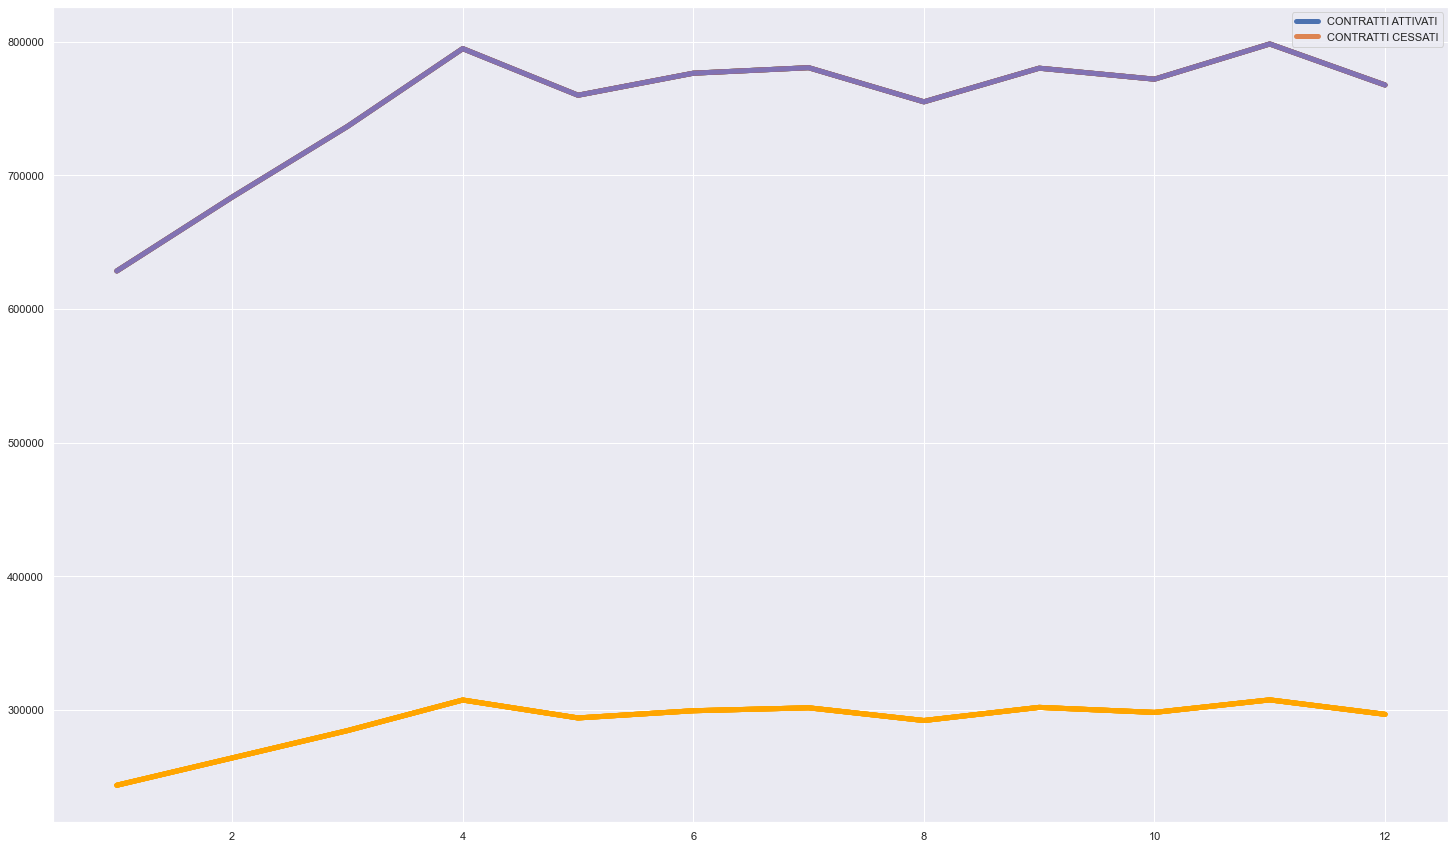

In [70]:
gg = plt.plot(groupMeseA, label = "CONTRATTI ATTIVATI", linewidth = 5)
fg = plt.plot(groupMeseC, label = "CONTRATTI CESSATI", linewidth = 5, color = 'orange')
plt.legend(['CONTRATTI ATTIVATI', 'CONTRATTI CESSATI'])
plt.show()

Analizzo andamento anni

In [71]:
groupAnnoA.head()

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,STATO,MESE
ANNO,,,,,
2009,343633,343633,343633,343633,343633
2010,664417,664417,664417,664417,664417
2011,704130,704130,704130,704130,704130
2012,641593,641593,641593,641593,641593
2013,654557,654557,654557,654557,654557


C:\Users\ggudy\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='ANNO'>

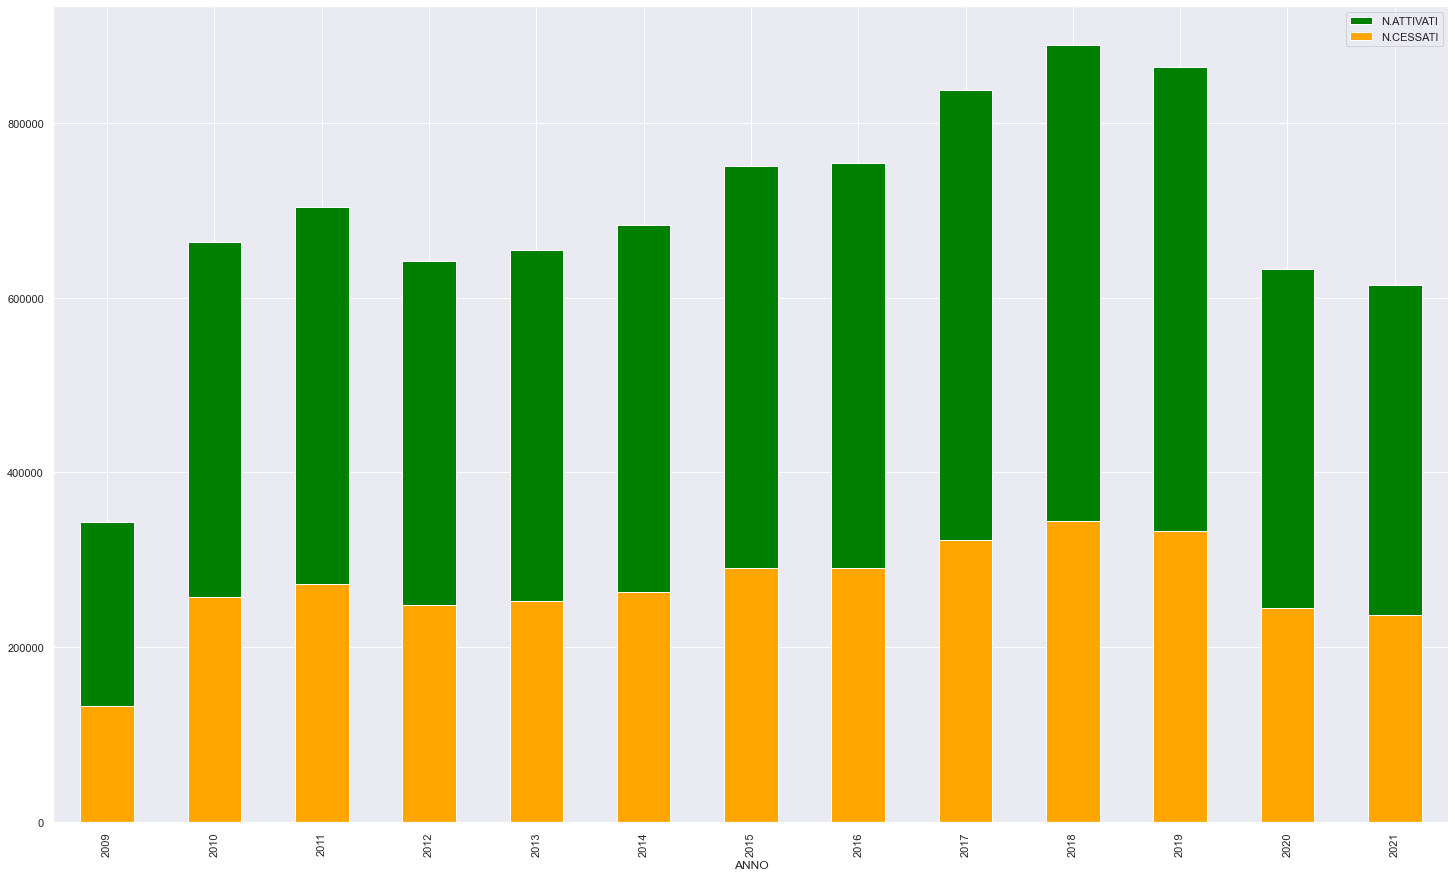

In [72]:
gToPlot3 = groupAnnoA.iloc[:, [2]]
gToPlot3.rename(columns={'SETTOREECONOMICODETTAGLIO': 'N.ATTIVATI'}, inplace=True)
gToPlot4 = groupAnnoC.iloc[:, [2]]
gToPlot4.rename(columns={'SETTOREECONOMICODETTAGLIO': 'N.CESSATI'}, inplace=True)
ax = gToPlot3.plot(kind="bar", color = "green")
gToPlot4.plot( kind="bar", ax=ax, color="orange")

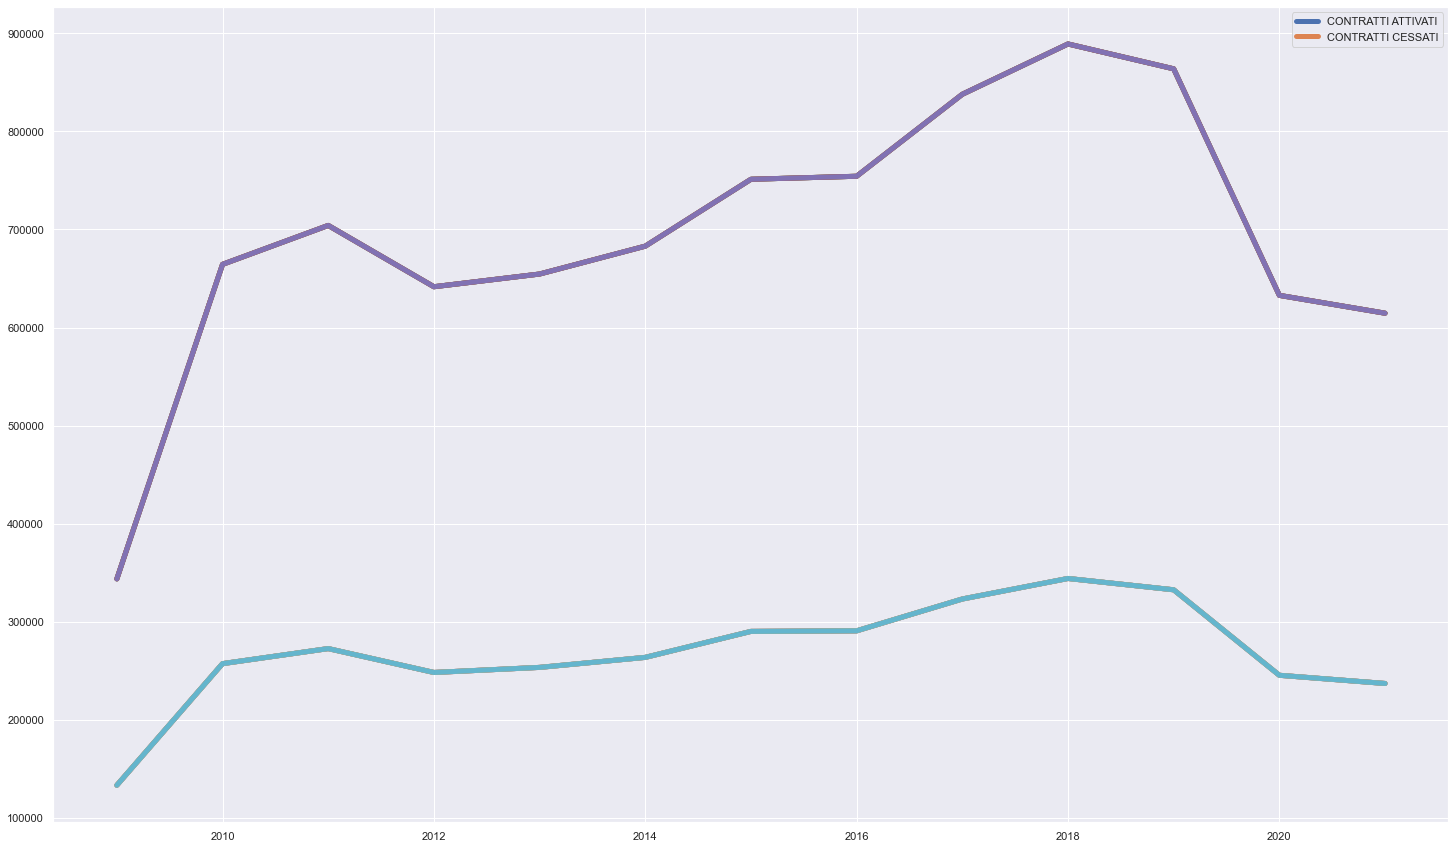

In [73]:
gg = plt.plot(groupAnnoA, label = "CONTRATTI ATTIVATI", linewidth = 5)
fg = plt.plot(groupAnnoC, label = "CONTRATTI CESSATI", linewidth = 5)
plt.legend(['CONTRATTI ATTIVATI', 'CONTRATTI CESSATI'])
plt.show()

In [95]:
totalDataForYear=dataset3[(dataset3['STATO']=='ATTIVATO')]
totalDataForYear=totalDataForYear.groupby(['DATA']).ANNO.count()
totalDataForYear=pd.DataFrame({'Data': totalDataForYear.index,'Value count': totalDataForYear.values})

totalDataForYear['ANNO'] = [d.year for d in totalDataForYear.Data]
totalDataForYear['MESE'] = [d.strftime('%b') for d in totalDataForYear.Data]

years=totalDataForYear['ANNO'].unique()

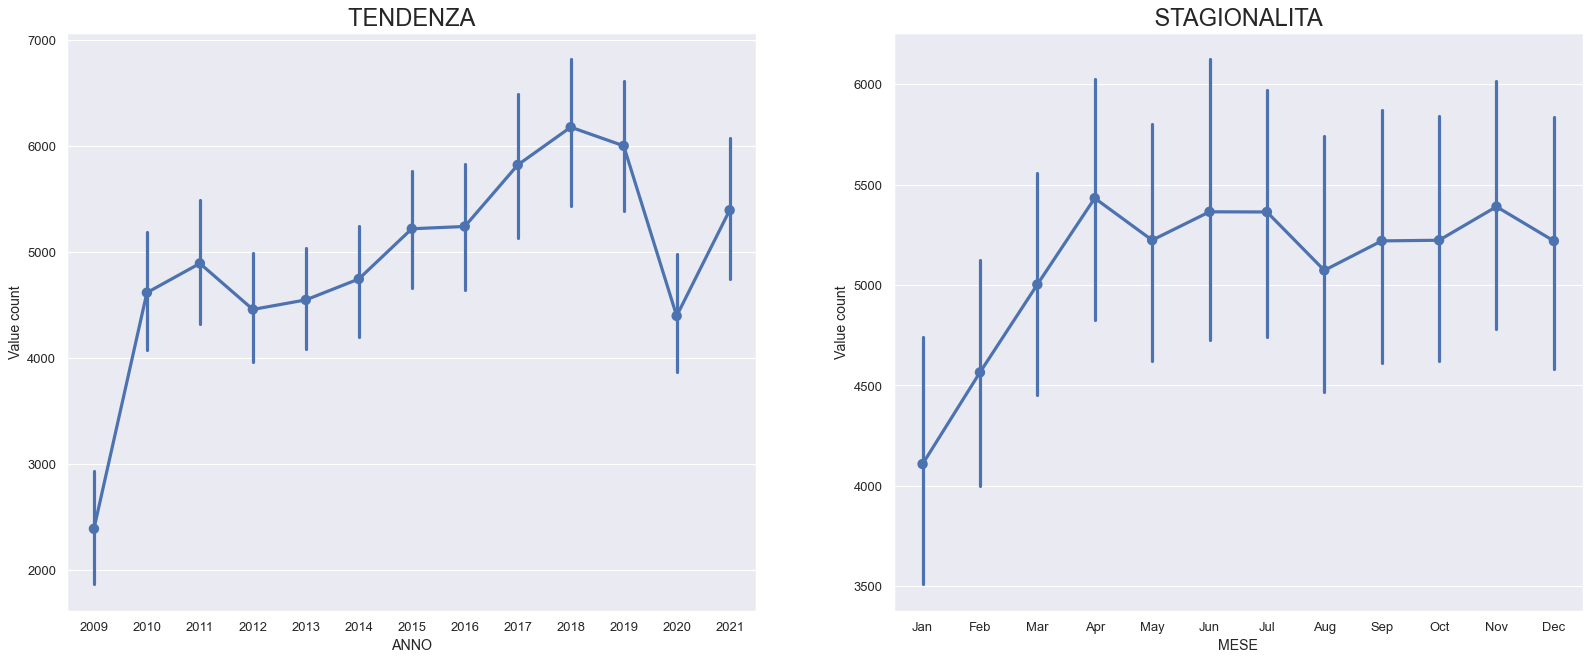

In [104]:
fig, axes=plt.subplots(1,2,figsize=(23,9), dpi=85)

#attivati
sns.pointplot(x='ANNO',y='Value count',data=totalDataForYear, ax=axes[0])
sns.pointplot(x='MESE', y='Value count',data=totalDataForYear.loc[~totalDataForYear.ANNO.isin([2009, 2021]), :],ax=axes[1])

axes[0].set_title(' TENDENZA ',fontsize=20); 
axes[1].set_title(' STAGIONALITA ',fontsize=20)

plt.show()

In [110]:
totalDataForYearC=dataset3[(dataset3['STATO']=='CESSATO')]
totalDataForYearC=totalDataForYearC.groupby(['DATA']).ANNO.count()
totalDataForYearC=pd.DataFrame({'Data': totalDataForYearC.index,'Value count': totalDataForYearC.values})

totalDataForYearC['ANNO'] = [d.year for d in totalDataForYearC.Data]
totalDataForYearC['MESE'] = [d.strftime('%b') for d in totalDataForYearC.Data]

yearsC=totalDataForYearC['ANNO'].unique()

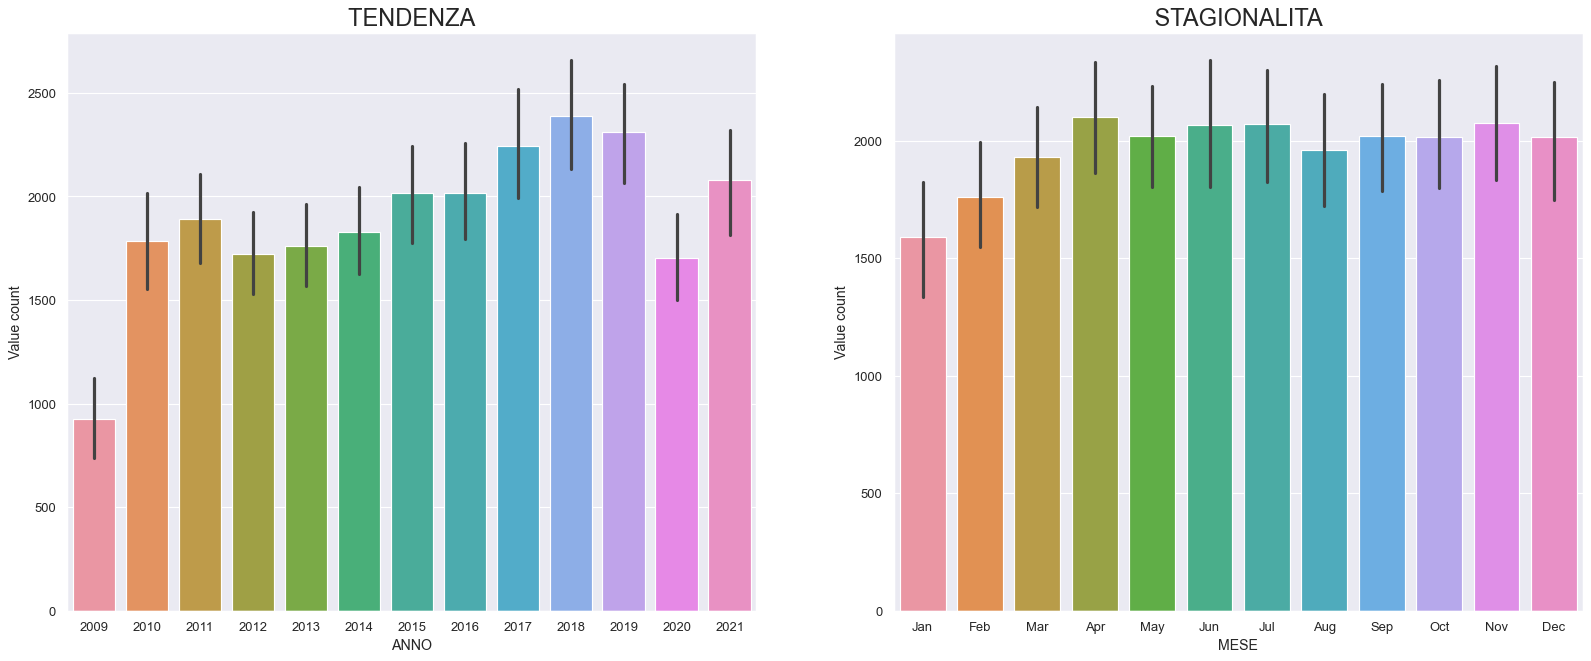

In [112]:
fig, axes=plt.subplots(1,2,figsize=(23,9), dpi=85)

#cessati
sns.barplot(x='ANNO',y='Value count',data=totalDataForYearC, ax=axes[0])
sns.barplot(x='MESE', y='Value count',data=totalDataForYearC.loc[~totalDataForYearC.ANNO.isin([2009, 2021]), :],ax=axes[1])

axes[0].set_title(' TENDENZA ',fontsize=20); 
axes[1].set_title(' STAGIONALITA ',fontsize=20)

plt.show()

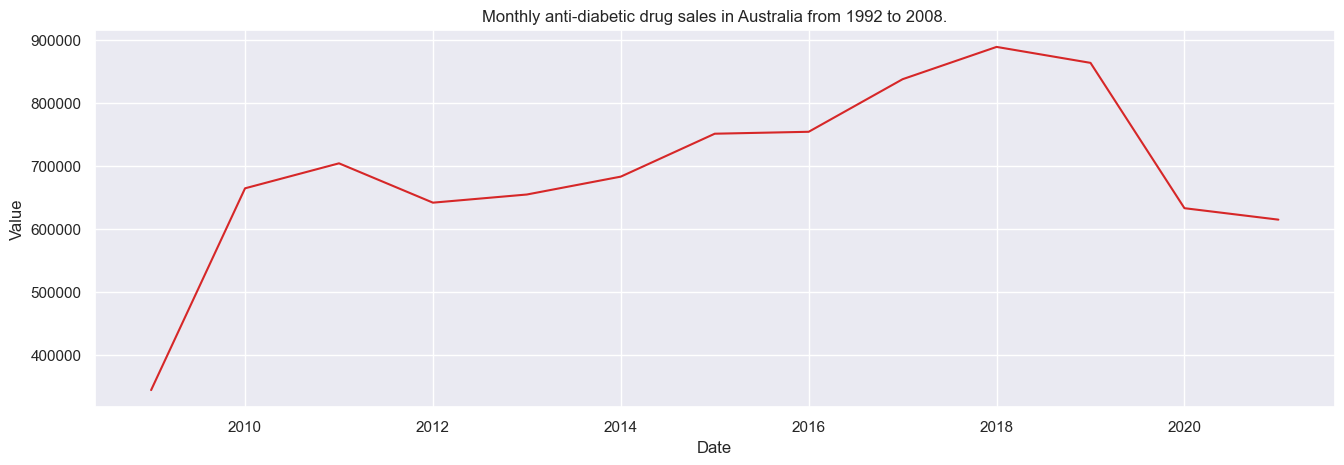

In [169]:
#attivati contratti time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=groupAnnoA.index, y=groupAnnoA.SETTOREECONOMICODETTAGLIO, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

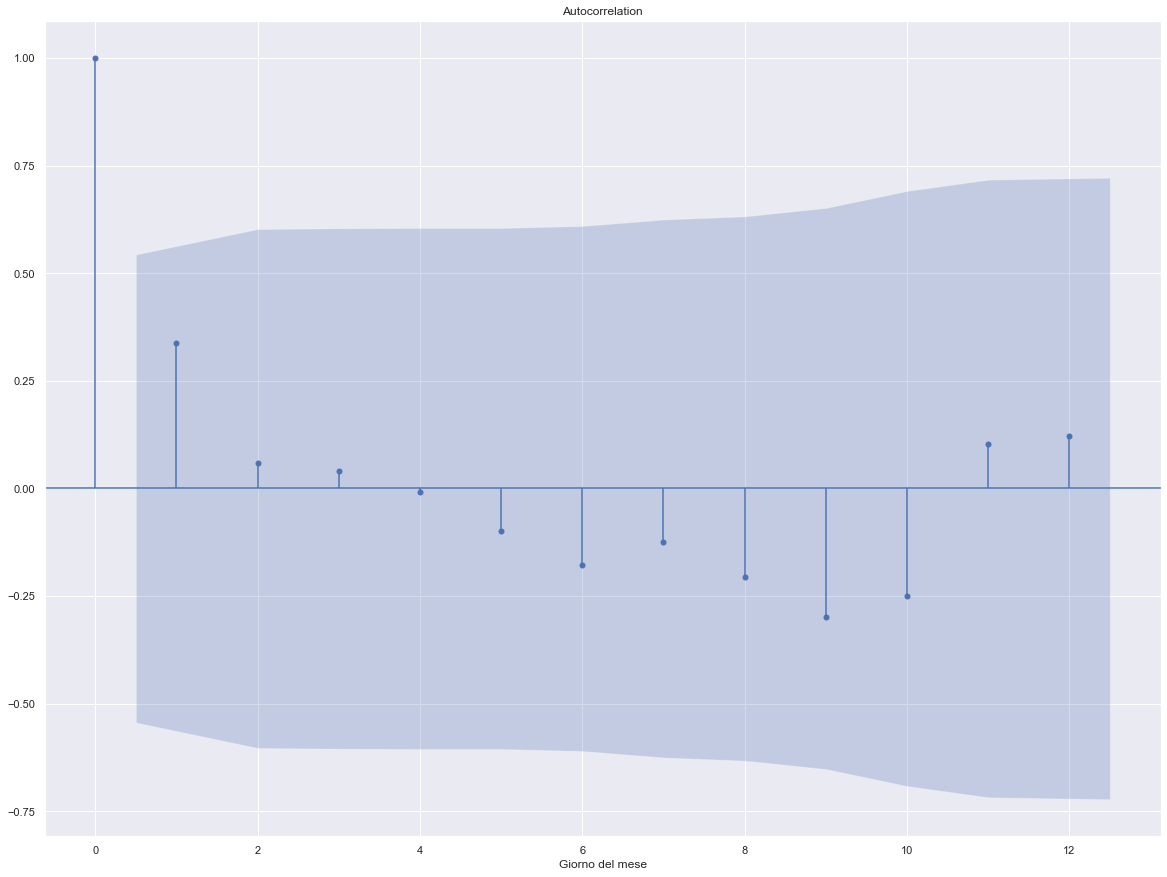

In [171]:
#autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plt.rc('figure', figsize=(20, 15))
plot_acf(groupAnnoA.SETTOREECONOMICODETTAGLIO)
plt.xlabel('Giorno del mese')
plt.show()

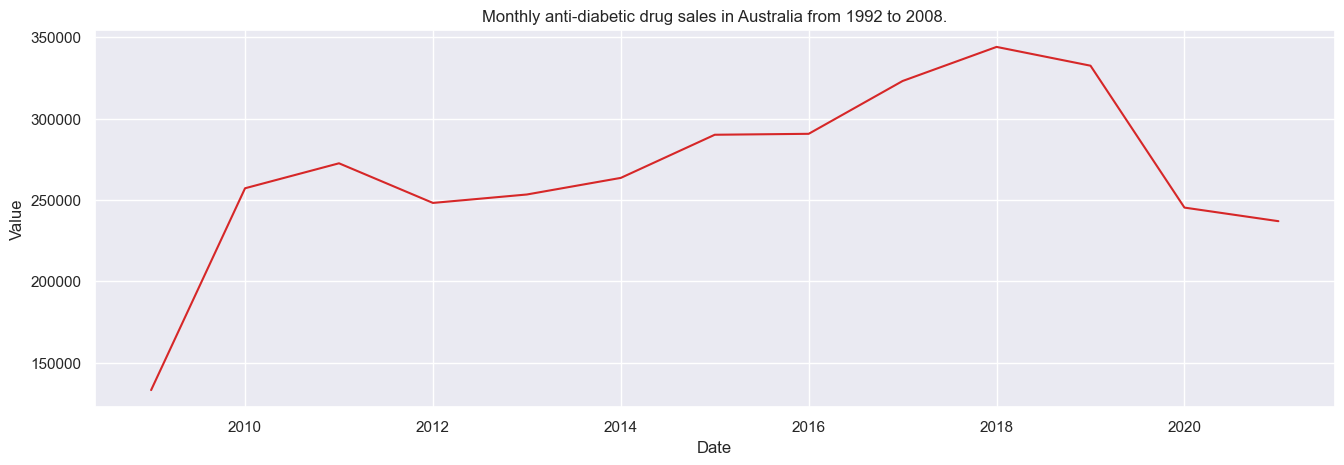

In [173]:
#cessati per anno time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=groupAnnoC.index, y=groupAnnoC.SETTOREECONOMICODETTAGLIO, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

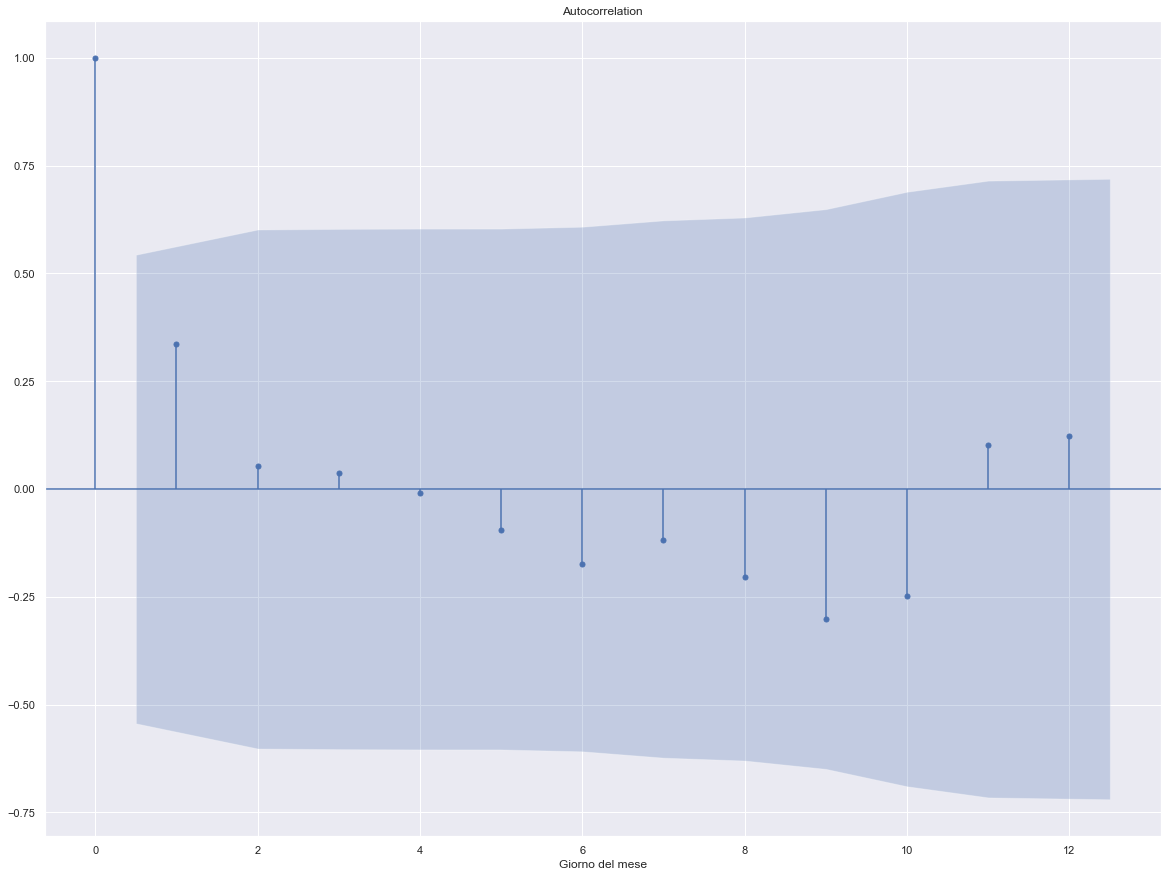

In [174]:
#autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plt.rc('figure', figsize=(20, 15))
plot_acf(groupAnnoC.SETTOREECONOMICODETTAGLIO)
plt.xlabel('Giorno del mese')
plt.show()